In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [34]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

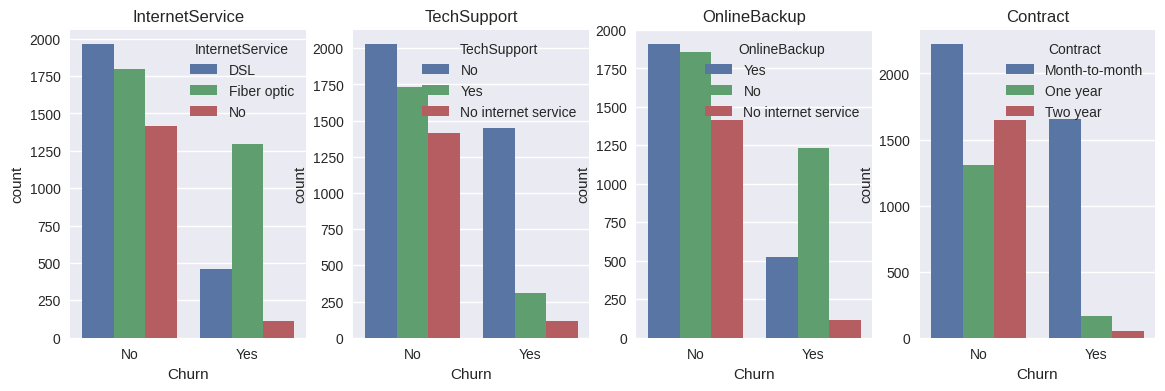

In [36]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [37]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

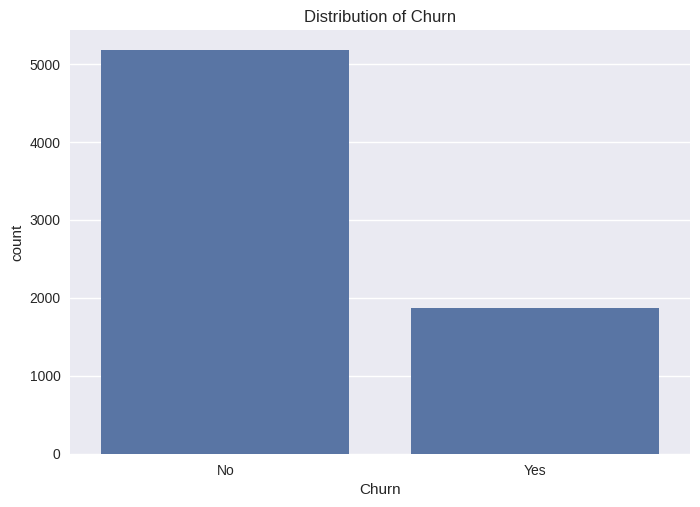

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()


In [39]:
# Descriptive statistics for numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    print(f"Descriptive Statistics for {col}")
    print(df[col].describe())
    print("\n")


Descriptive Statistics for tenure
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


Descriptive Statistics for MonthlyCharges
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


Descriptive Statistics for TotalCharges
count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object




In [40]:
# Count of each category in categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"Count of each category in {col}")
    print(df[col].value_counts())
    print("\n")


Count of each category in gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


Count of each category in SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Count of each category in Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Count of each category in Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Count of each category in PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Count of each category in MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Count of each category in InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Count of each category in OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


Count of each category in Onlin

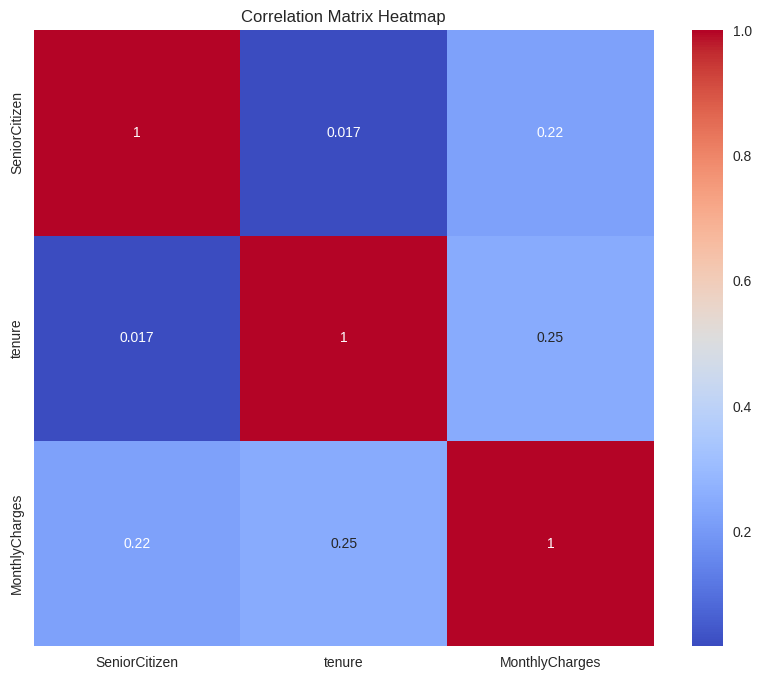

In [41]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Computing the correlation matrix with only numeric columns
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [42]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [43]:
object_cols = df.select_dtypes(include=['object']).columns


label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])



In [44]:
over = SMOTE(sampling_strategy = 1)

X = df.drop('Churn', axis=1)
y = df['Churn']


X, y = over.fit_resample(X, y)
Counter(y)

Counter({0: 5174, 1: 5174})

In [45]:

from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, f_classif

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)

# 2. Feature Selection
selector = SelectKBest(f_classif, k=30)  # Select top 30 features
X_selected = selector.fit_transform(X_poly, y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [48]:
X_test



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
9428,2141,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,1,20.138044,1608
4593,6524,0,0,0,0,11,1,0,2,1,1,1,1,1,1,0,0,0,20.300000,2108
5379,4456,0,0,1,0,56,1,2,1,2,0,0,0,2,2,1,1,2,98.000000,4412
8918,2411,0,0,0,0,30,1,1,0,0,1,0,0,2,2,0,1,2,83.655951,2002
6448,2579,1,0,0,0,58,1,2,1,0,0,2,2,2,2,1,1,2,104.650000,5051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,6861,1,0,1,1,52,0,1,0,2,0,2,0,0,2,1,0,0,44.250000,1913
766,3667,1,0,0,0,22,1,2,1,0,2,0,0,0,0,0,1,3,78.850000,1059
1144,573,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.550000,3033
3065,3619,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,45.800000,3824


In [49]:
print("X_train shape:", X_train.shape)
print("X_train columns:", X_train.columns)


X_train shape: (8278, 20)
X_train columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


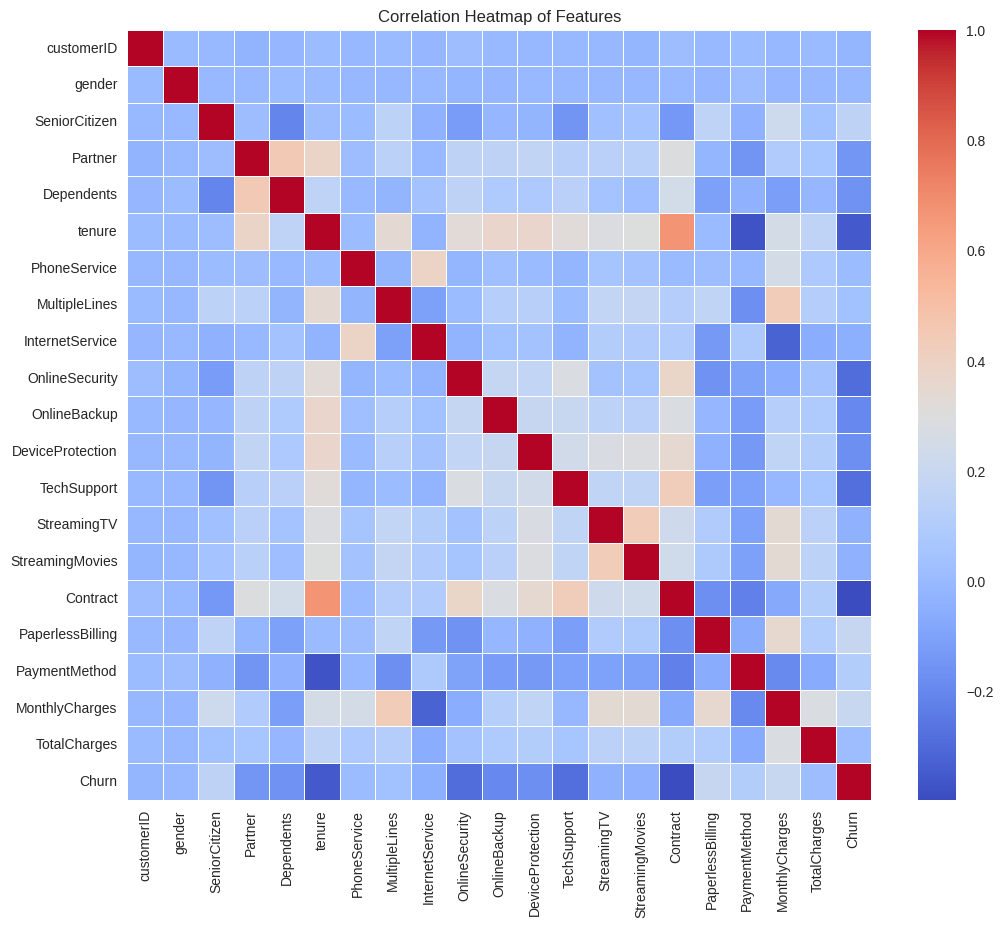

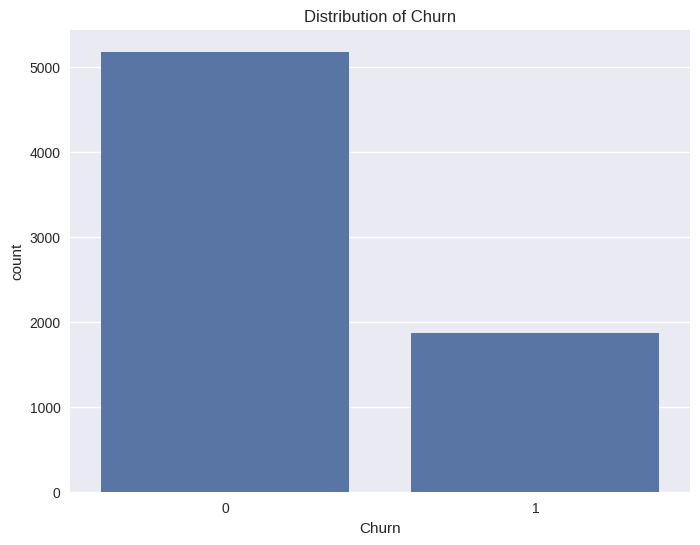

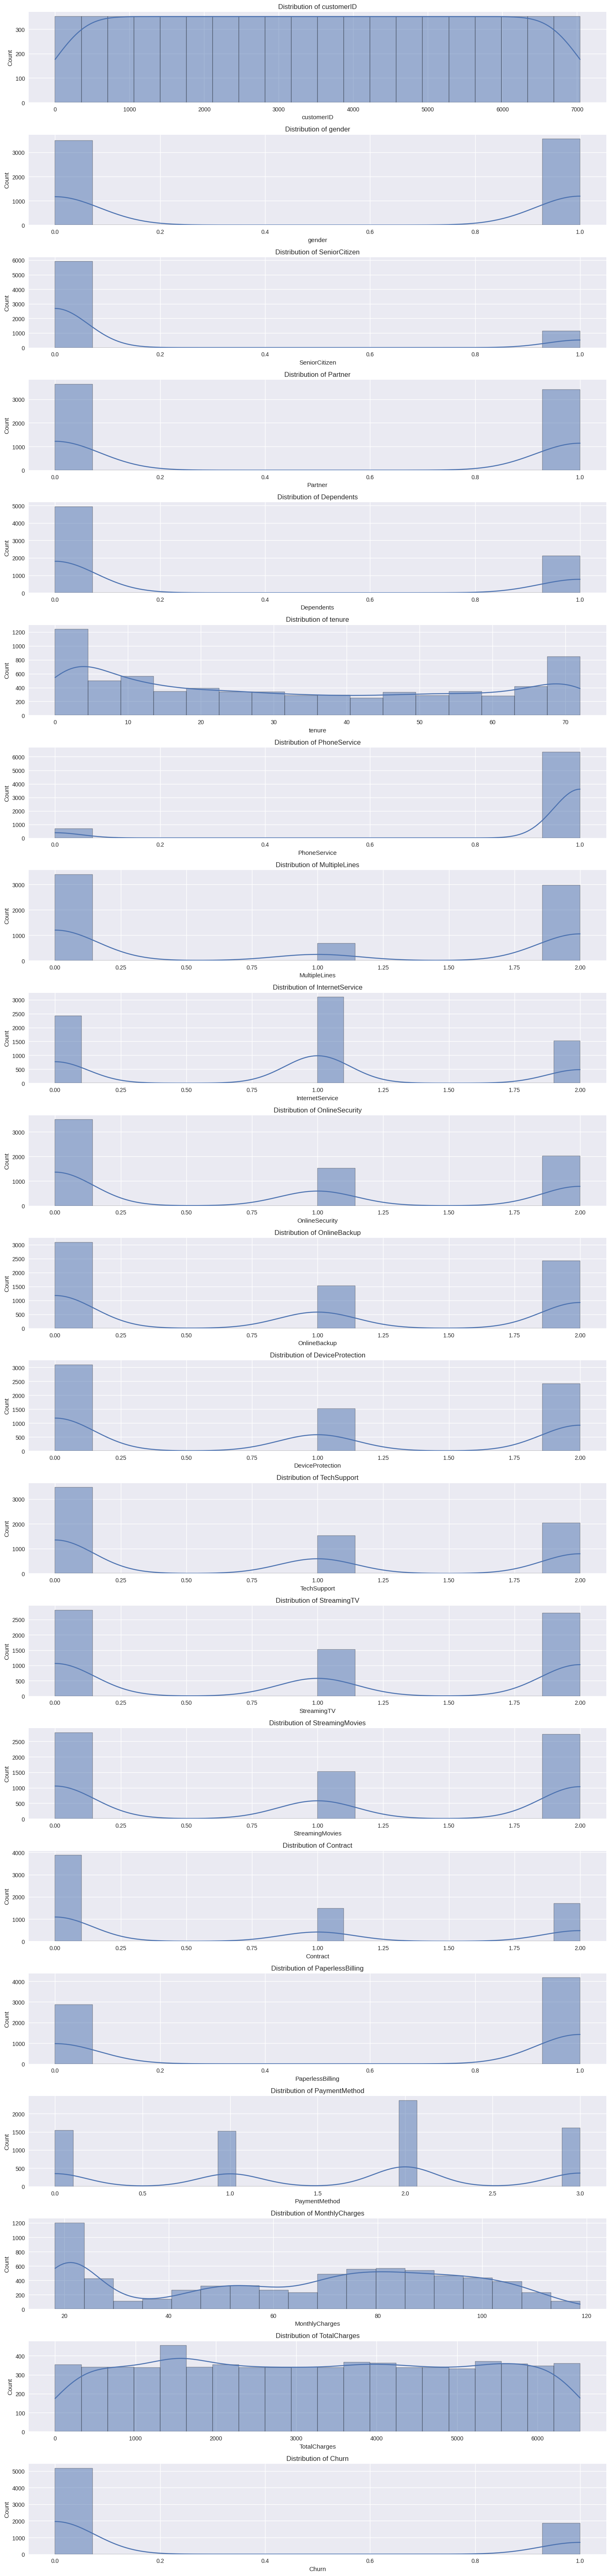

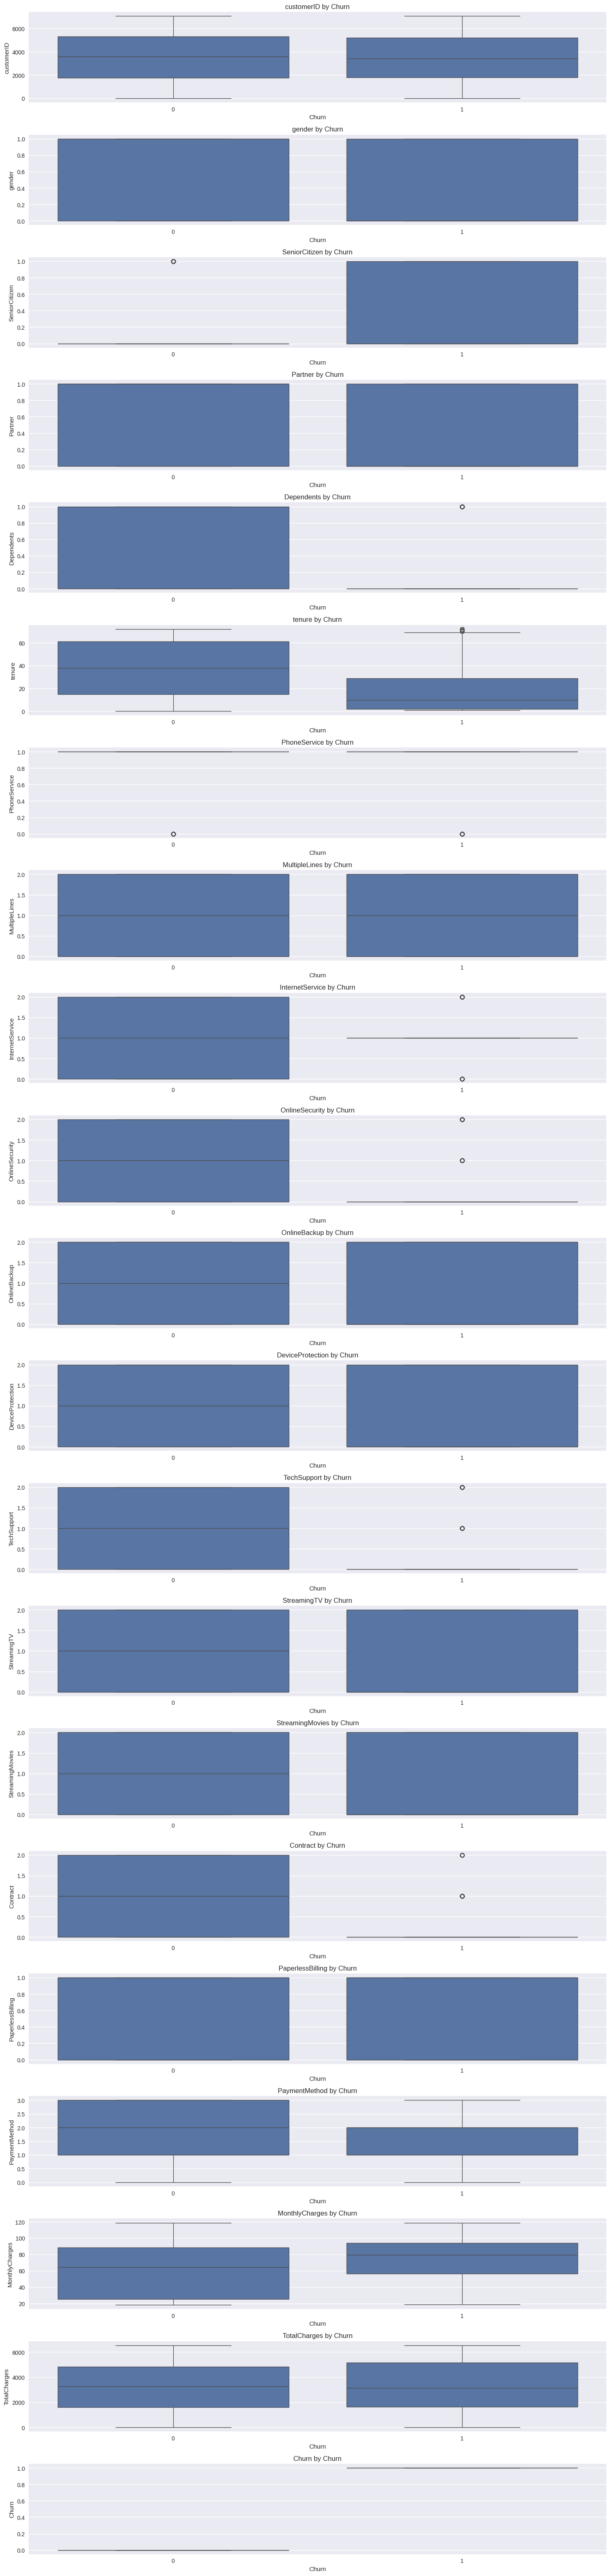

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance


def visualize_data(df):
    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Features')
    plt.show()

    # Distribution of target variable
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Churn', data=df)
    plt.title('Distribution of Churn')
    plt.show()

    # Distribution of numerical features
    num_features = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, len(num_features) * 3))
    for i, feature in enumerate(num_features, 1):
        plt.subplot(len(num_features), 1, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

    # Boxplots for numerical features by churn
    plt.figure(figsize=(15, len(num_features) * 3))
    for i, feature in enumerate(num_features, 1):
        plt.subplot(len(num_features), 1, i)
        sns.boxplot(x='Churn', y=feature, data=df)
        plt.title(f'{feature} by Churn')
    plt.tight_layout()
    plt.show()

visualize_data(df)


In [51]:
# Convert 'No' and 'Yes' to strings if necessary
y_train = y_train.astype(str).replace({'No': '0', 'Yes': '1'}).astype(int)
y_test = y_test.astype(str).replace({'No': '0', 'Yes': '1'}).astype(int)


In [52]:
y_train,y_test

(4541     1
 5709     0
 7393     1
 10026    1
 3578     0
         ..
 5734     0
 5191     0
 5390     1
 860      0
 7270     1
 Name: Churn, Length: 8278, dtype: int64,
 9428    1
 4593    0
 5379    0
 8918    1
 6448    1
        ..
 6425    0
 766     0
 1144    1
 3065    0
 7073    1
 Name: Churn, Length: 2070, dtype: int64)

In [53]:


# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate models
models = [lr_model, rf_model, xgb_model]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [lr_pred, rf_pred, xgb_pred]

for name, pred in zip(model_names, predictions):
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))


Logistic Regression Results:
Accuracy: 0.8280
Confusion Matrix:
[[798 223]
 [133 916]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1021
           1       0.80      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


Random Forest Results:
Accuracy: 0.8589
Confusion Matrix:
[[876 145]
 [147 902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


XGBoost Results:
Accuracy: 0.8493
Confusion Matrix:
[[872 149]
 [163 886]]
Classification Report:
              precision    reca

In [54]:


# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Hyperparameter tuning
param_dists = {
    'Logistic Regression': {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']},
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20, 30, 40, 50, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9]
    }
}






In [55]:
# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Results:")
    #print(f"Best parameters: {best_model.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8280
Confusion Matrix:
[[798 223]
 [133 916]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1021
           1       0.80      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


Training Random Forest...

Random Forest Results:
Accuracy: 0.8589
Confusion Matrix:
[[876 145]
 [147 902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


Training XGBoost...

XGBoost Results:
Accuracy: 0.8493
Confusion Matr

<ipython-input-56-334b494007ce>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-56-334b494007ce>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-334b494007ce>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-334b494007ce>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-334b494007ce>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xtic

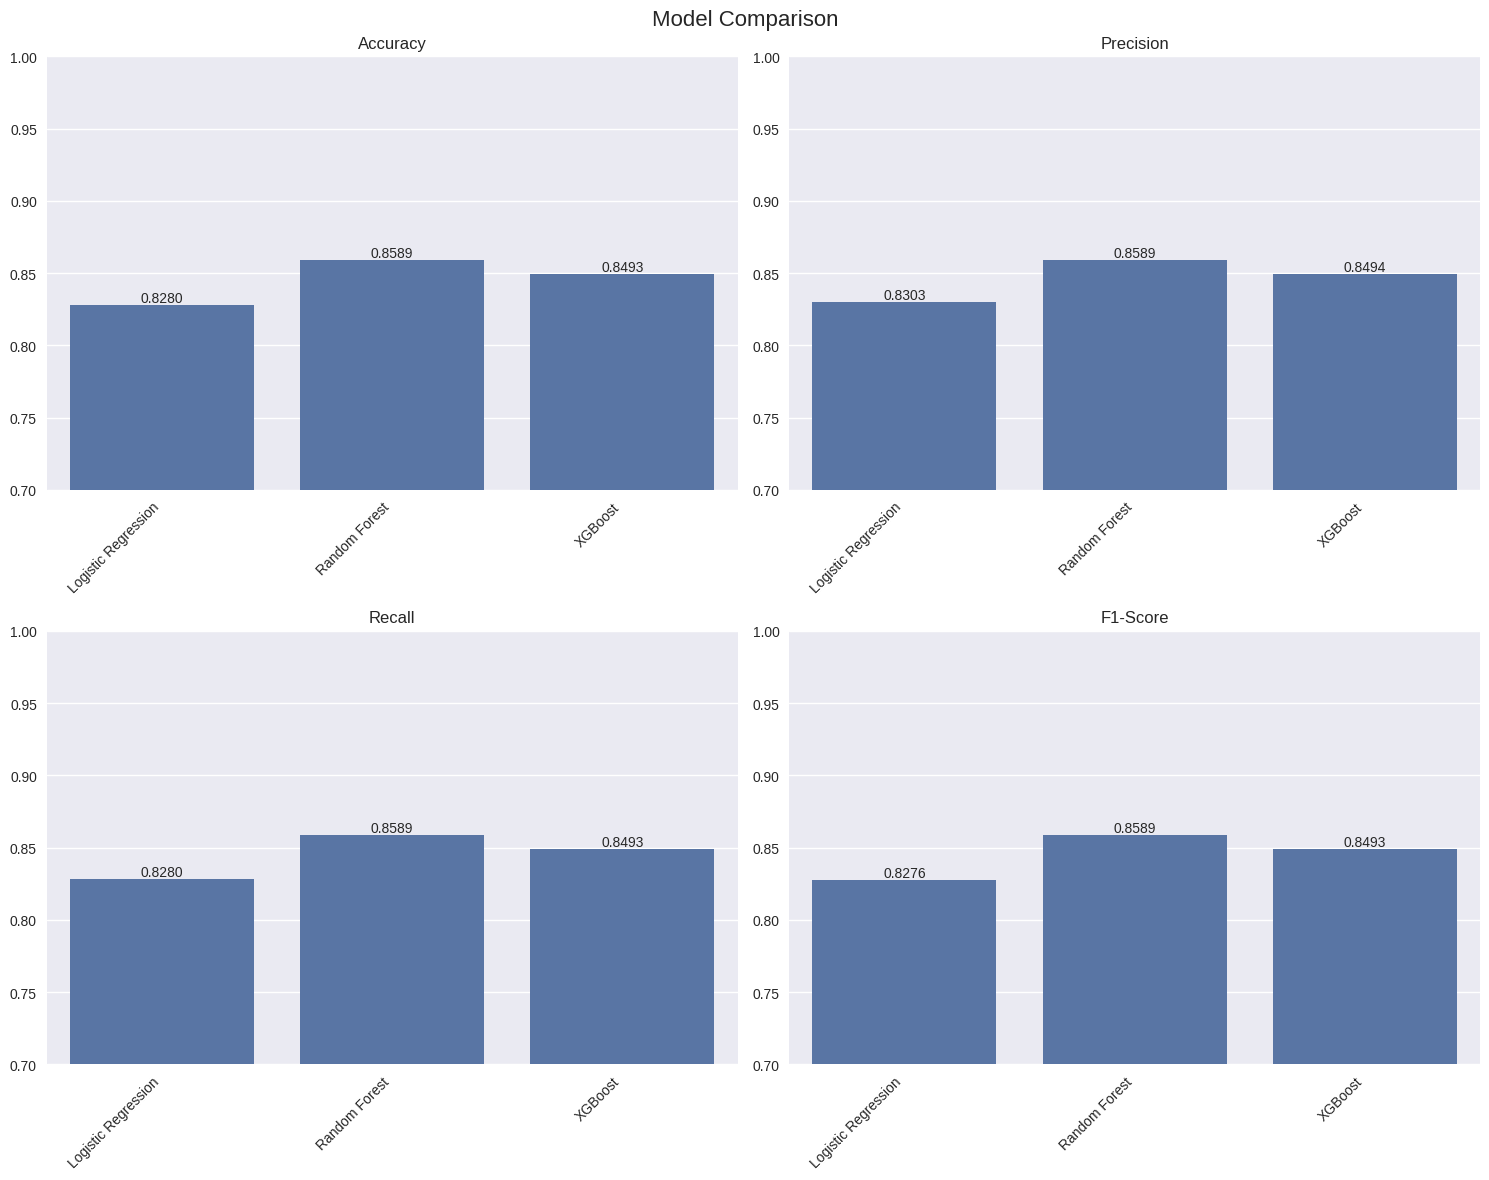

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Comparison', fontsize=16)

# Create a bar plot for each metric
for idx, (metric, values) in enumerate(metrics.items()):
    row = idx // 2
    col = idx % 2
    ax = axs[row, col]
    sns.barplot(x=model_names, y=values, ax=ax)
    ax.set_title(metric)
    ax.set_ylim(0.7, 1.0)  # Adjust this range as needed
    for i, v in enumerate(values):
        ax.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



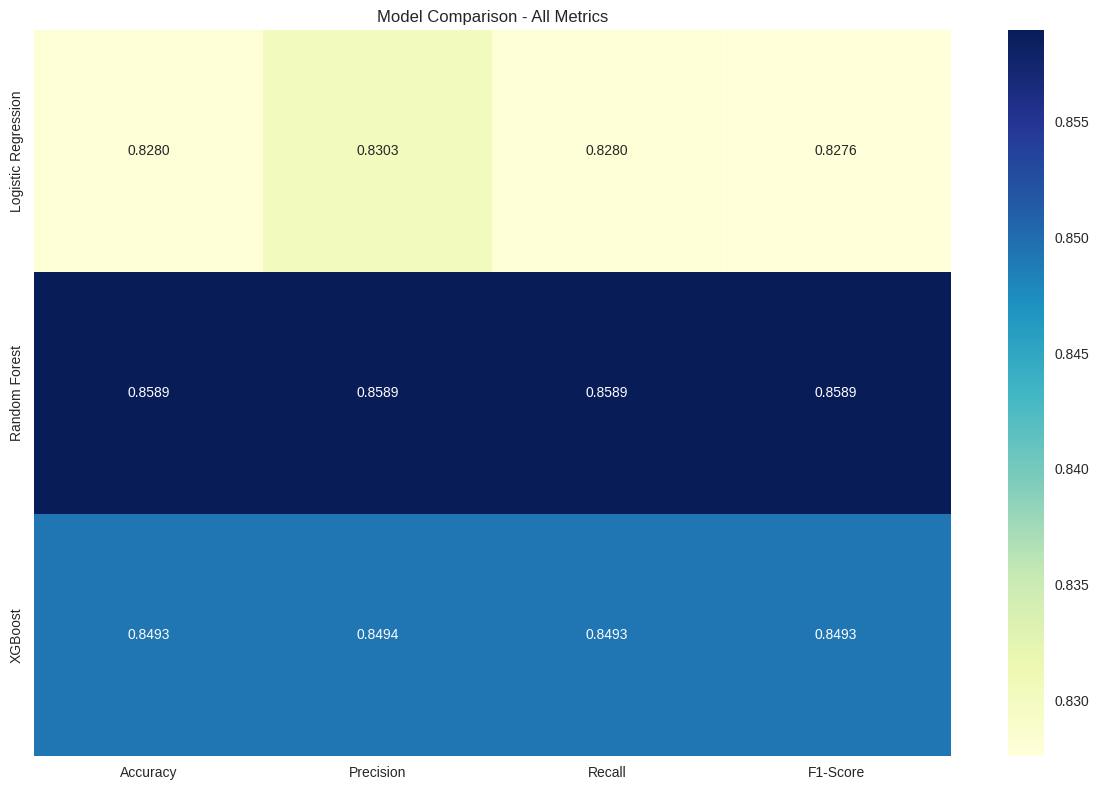

In [57]:
# Create a heatmap for all metrics
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(metrics, index=model_names), annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Model Comparison - All Metrics')
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score


best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test_scaled)))

best_model_accuracy = accuracy_score(y_test, best_model[1].predict(X_test_scaled))

print(f"\nBest Model: {best_model[0]} with an accuracy of {best_model_accuracy:.2f}%")



Best Model: Random Forest with an accuracy of 0.86%


In [59]:
import joblib


In [62]:
# Save the best model
joblib.dump(best_model[1], 'best_model.joblib') # Save the model object, not the tuple
#print(f"Best model ({best_model}) saved as 'best_model.joblib'")


loaded_model = joblib.load('best_model.joblib') # Load the model object

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib


loaded_model = joblib.load('best_model.joblib')

def preprocess_new_data(new_data, original_df):

    columns = ["customerID", "gender", "SeniorCitizen", "Partner", "Dependents",
               "tenure", "PhoneService", "MultipleLines", "InternetService",
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
               "PaymentMethod", "MonthlyCharges", "TotalCharges"]
    df = pd.DataFrame(new_data, columns=columns)

    # Apply label encoding to all object columns
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object' or column in ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
            # Combine original and new data for fitting
            combined = pd.concat([original_df[column], df[column]], ignore_index=True)
            le.fit(combined.astype(str))
            df[column] = le.transform(df[column].astype(str))

    # Convert numeric columns
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
    df['tenure'] = df['tenure'].astype(int)
    df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Ensure all columns from original dataset are present
    for column in original_df.columns:
        if column not in df.columns:
            df[column] = original_df[column].mode()[0]

    # Ensure the order of columns matches the original dataset (including 'Churn')
    df = df[original_df.columns.drop('customerID')]

    # Add a placeholder 'Churn' column
    df['Churn'] = 0

    return df

original_df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# New data
new_data = [
    ["6713-OKOMC", "Female", 0, "No", "No", 10, "No", "No phone service", "DSL", "Yes", "No", "No", "No", "No", "No", "Month-to-month", "No", "Mailed check", 29.75, 301.9]
]


preprocessed_data = preprocess_new_data(new_data, original_df)



preprocessed_array = preprocessed_data.values

predictions = loaded_model.predict(preprocessed_array)
probabilities = loaded_model.predict_proba(preprocessed_array)[:, 1]

print("Predictions:", predictions)
print(f"Probability of churn: {probabilities[0]:.2%}")

Predictions: [0]
Probability of churn: 38.00%


In [64]:
if predictions[0] == 0:
    print("Prediction: No churn")
else:
    print("Prediction: Churn")

Prediction: Churn
